# CPU PERFORMENCE DATA

In [1]:
import pandas as pb

In [2]:
machine=pb.read_csv("machine.csv")

In [3]:
machine.head()

VENDO     MODE  MYC   MIN    MAX  CACH  CMIN  CMAX  PRP  ERP
0  adviser    32/60  125   256   6000   256    16   128  198  199
1   amdahl   470v/7   29  8000  32000    32     8    32  269  253
2   amdahl  470v/7a   29  8000  32000    32     8    32  220  253
3   amdahl  470v/7b   29  8000  32000    32     8    32  172  253
4   amdahl  470v/7c   29  8000  16000    32     8    16  132  132

In [4]:
machine=machine.drop('VENDO',axis=1)
machine.shape     

(209, 9)

In [5]:
machine=machine.drop('MODE',axis=1)
machine.shape

(209, 8)

In [6]:
machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MYC     209 non-null    int64
 1   MIN     209 non-null    int64
 2   MAX     209 non-null    int64
 3   CACH    209 non-null    int64
 4   CMIN    209 non-null    int64
 5   CMAX    209 non-null    int64
 6   PRP     209 non-null    int64
 7   ERP     209 non-null    int64
dtypes: int64(8)
memory usage: 13.2 KB


In [7]:
machine["CACH"].value_counts()

0      69
8      31
32     23
64     20
16     14
4       8
24      7
128     6
6       5
2       4
30      4
9       2
160     2
1       2
12      2
131     2
48      2
65      2
112     2
256     2
Name: CACH, dtype: int64

In [8]:
machine.describe()

MYC           MIN           MAX        CACH        CMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   24.889952    4.698565   
std     260.262926   3878.742758  11726.564377   40.609211    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.000000   
max    1500.000000  32000.000000  64000.000000  256.000000   52.000000   

             CMAX          PRP          ERP  
count  209.000000   209.000000   209.000000  
mean    18.267943   105.674641    99.330144  
std     25.997318   158.943929   154.757102  
min      0.000000     6.000000    15.000000  
25%      5.000000    27.000000    28.000000  
50%      8.000000    50.000000    45.000000  
75%     24.000000   114.000000   101.000000  
max    176.000000  1150.000000  1238.000000

In [9]:
%matplotlib inline

## Train Test Splitting

In [10]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(machine,test_size=0.1,random_state=42)
print(f"Rows in Train_set :{len(train_set)}\n Rows in test_set :{len(test_set)}")

Rows in Train_set :188
 Rows in test_set :21


## Stratified shuffle split

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=42)
for train_index, test_index in split.split(machine,machine['CACH']):
    strat_train_set=machine.loc[train_index]
    strat_test_set=machine.loc[test_index]

In [12]:
strat_test_set['CACH'].value_counts()

0      7
8      3
16     2
64     2
32     2
24     1
128    1
6      1
4      1
2      1
Name: CACH, dtype: int64

In [13]:
strat_train_set['CACH'].value_counts()

0      62
8      28
32     21
64     18
16     12
4       7
24      6
128     5
30      4
6       4
2       3
256     2
48      2
131     2
65      2
12      2
9       2
112     2
1       2
160     2
Name: CACH, dtype: int64

In [14]:
machine=strat_train_set.copy()

## Corelation

In [15]:
corr_matrix=machine.corr()
corr_matrix['ERP'].sort_values(ascending=False)

ERP     1.000000
PRP     0.950760
MAX     0.906464
MIN     0.821175
CMIN    0.606093
CACH    0.595447
CMAX    0.593189
MYC    -0.289821
Name: ERP, dtype: float64

In [16]:
from pandas.plotting import scatter_matrix

In [17]:
attributes=['PRP','MAX','MYC','ERP']

In [18]:
scatter_matrix(machine[attributes],figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002167E9650C8>,
      dtype=object)

In [19]:
machine.plot(kind='scatter',x='PRP',y='ERP',alpha=0.8)

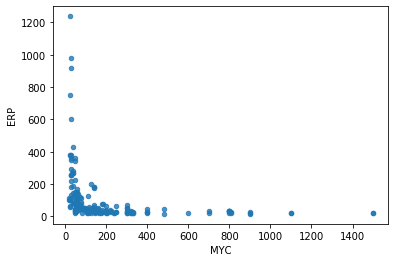

In [20]:
machine.plot(kind='scatter',x='MYC',y='ERP',alpha=0.8)

## Trying out Attributes combinations

In [21]:
machine['PRPCMIN']=machine['MAX']/machine['PRP']

In [22]:
machine.head()

MYC   MIN    MAX  CACH  CMIN  CMAX  PRP  ERP     PRPCMIN
172  200  2000   8000    64     1     5   41   67  195.121951
73   300   768   3000     0     6    24   36   23   83.333333
67   105   256   2000     0     3    10   26   20   76.923077
80   330  1000   3000     0     2     4   16   23  187.500000
97    26  8000  32000     0     8    24  277  220  115.523466

In [23]:
machine.shape

(188, 9)

In [24]:
corr_matrix=machine.corr()
corr_matrix['ERP'].sort_values(ascending=False)

ERP        1.000000
PRP        0.950760
MAX        0.906464
MIN        0.821175
CMIN       0.606093
CACH       0.595447
CMAX       0.593189
PRPCMIN   -0.192710
MYC       -0.289821
Name: ERP, dtype: float64

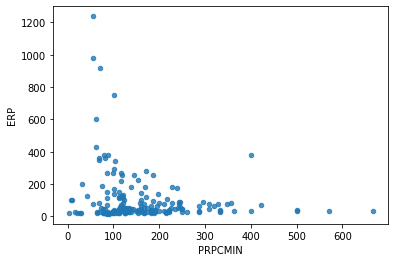

In [25]:
machine.plot(kind='scatter',x='PRPCMIN',y='ERP',alpha=0.8)

In [26]:
machine.describe()

MYC           MIN           MAX        CACH        CMIN  \
count   188.000000    188.000000    188.000000  188.000000  188.000000   
mean    204.803191   2956.297872  11874.106383   25.478723    4.856383   
std     261.055055   4015.256977  12010.868042   41.527577    7.109955   
min      17.000000     96.000000    512.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     113.500000   2000.000000   8000.000000    8.000000    2.000000   
75%     228.750000   4000.000000  16000.000000   32.000000    6.000000   
max    1500.000000  32000.000000  64000.000000  256.000000   52.000000   

             CMAX          PRP          ERP     PRPCMIN  
count  188.000000   188.000000   188.000000  188.000000  
mean    18.893617   108.776596   102.308511  159.917382  
std     27.105051   165.535052   161.496976  100.552159  
min      0.000000     6.000000    15.000000    2.216450  
25%      5.000000    27.000000    28.000000  100.000000  
50%      8.000000    50.000000    45.000000  133.333333  
75%     24.000000   122.500000   101.250000  191.637631  
max    176.000000  1150.000000  1238.000000  666.666667

In [27]:
machine=strat_train_set.drop('ERP',axis=1)
machine_labels=strat_train_set['ERP'].copy()

## Imputer for missing values

In [28]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(machine)
x=imputer.transform(machine)
machine_tr=pb.DataFrame(x,columns=machine.columns)
machine_tr.describe()

MYC           MIN           MAX        CACH        CMIN  \
count   188.000000    188.000000    188.000000  188.000000  188.000000   
mean    204.803191   2956.297872  11874.106383   25.478723    4.856383   
std     261.055055   4015.256977  12010.868042   41.527577    7.109955   
min      17.000000     96.000000    512.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     113.500000   2000.000000   8000.000000    8.000000    2.000000   
75%     228.750000   4000.000000  16000.000000   32.000000    6.000000   
max    1500.000000  32000.000000  64000.000000  256.000000   52.000000   

             CMAX          PRP  
count  188.000000   188.000000  
mean    18.893617   108.776596  
std     27.105051   165.535052  
min      0.000000     6.000000  
25%      5.000000    27.000000  
50%      8.000000    50.000000  
75%     24.000000   122.500000  
max    176.000000  1150.000000

In [29]:
imputer.statistics_

array([1.135e+02, 2.000e+03, 8.000e+03, 8.000e+00, 2.000e+00, 8.000e+00,
       5.000e+01])

## Creating a pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [31]:
machine_num_tr=my_pipeline.fit_transform(machine)

In [32]:
machine_num_tr.shape

(188, 7)

## Selecting a desired model for cpu performance data

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=RandomForestRegressor()
model=DecisionTreeRegressor()
#model=LinearRegression()

In [34]:
model.fit(machine_num_tr,machine_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [35]:
some_data=machine.iloc[:5]

In [36]:
some_labels=machine_labels.iloc[:5]

In [37]:
prepared_data=my_pipeline.transform(some_data)

In [38]:
model.predict(prepared_data)

array([ 67.,  23.,  20.,  23., 220.])

In [39]:
list(some_labels)

[67, 23, 20, 23, 220]

## Evaluating the model

In [40]:
import numpy as np
from sklearn.metrics import mean_squared_error
machine_prediction=model.predict(machine_num_tr)
mse=mean_squared_error(machine_labels,machine_prediction)
rmse=np.sqrt(mse)

In [41]:
rmse

0.0

## Using better evsluation technique - Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,machine_num_tr,machine_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)

In [43]:
rmse_scores

array([ 27.60053394,  46.82160995, 113.67937368,  35.6931366 ,
        10.16961418,  39.37872789,  48.80304132,  13.30017808,
        28.52386915,  64.60177156])

In [44]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard devision:",scores.std())

In [45]:
print_scores(rmse_scores)

Scores: [ 27.60053394  46.82160995 113.67937368  35.6931366   10.16961418
  39.37872789  48.80304132  13.30017808  28.52386915  64.60177156]
Mean: 42.85718563389004
Standard devision: 28.25492146353817


## Saving the model

In [46]:
#from joblib import dump,load
#dump(model,'CPU.joblib')

## Testing the model on test data

In [47]:
x_test=strat_test_set.drop('ERP',axis=1)
y_test=strat_test_set['ERP'].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(y_test))

[ 19. 190. 132.  54. 171. 117.  64.  27.  41.  88.  28.  33.  15.  80.
  75. 175.  50.  21.  25.  41.  30.] [18, 157, 126, 53, 275, 119, 64, 26, 35, 74, 25, 28, 15, 74, 81, 182, 56, 20, 28, 44, 26]


In [48]:
final_rmse

24.305594104277823